# Predicting Winners of Women's Singles Tennis Matches

In this project, I will first review tennis player data from WTA to determine what factors contribute towards winning a singles match in a tennis tournament. I'm using the following data source from Kaggle:  
https://www.kaggle.com/datasets/dissfya/wta-tennis-2007-2023-daily-update

## Outline
I will use the following steps to proceed with analysis.
1. **Import Necessary Libraries and Packages**
2. **Data Loading**: Load the ATP dataset.
3. **Data Cleaning**: Handle missing values and ensure data consistency.
4. **Data Transformation**: Generate a dataset at the player-level and bring over respective match-related attributes; Create a target y column to calculate probability of winning the final round in the 2025 US Open.
5. **Prepare Training, Testing, Validation Datasets**
6. **Develop Predictive Models**: Set up multiple models (e.g. multivariate logistic, random forest, KNN) to best calculate the probability of winning the final round in the 2025 US Open.

## Import Necessary Libraries and Packages
First, we will import any necessary dependencies.

In [2]:
# Install dependencies as needed:
%pip install kagglehub[pandas-datasets]
# Install/upgrade kagglehub to latest version
%pip install --upgrade kagglehub[pandas-datasets]==0.3.12

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [1]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

## Data Loading
First we will load the ATP datasets from Kaggle.

In [2]:
# Set the path to the file you'd like to load
file_path = "wta.csv"  # Update this to the correct file name if needed

# Load the latest version
dfwta = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "dissfya/wta-tennis-2007-2023-daily-update",
  # "dissfya/atp-tennis-daily-pull",
  file_path,
  # Provide any additional arguments like 
  # sql_query or pandas_kwargs. See the 
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

C:\Users\sarah\AppData\Local\Temp\ipykernel_11120\4047438785.py:5: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  dfwta = kagglehub.load_dataset(
C:\Users\sarah\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\kagglehub\pandas_datasets.py:91: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  result = read_function(


In [3]:
# Display first 5 records
dfwta.head()

,Tournament,Date,Court,Surface,Round,Best of,Player_1,Player_2,Winner,Rank_1,Rank_2,Pts_1,Pts_2,Odd_1,Odd_2,Score
0,ASB Classic,2007-01-01 00:00:00,Outdoor,Hard,1st Round,3,Sun T.T.,Baker L.,Sun T.T.,81,272,332,90,1.33,3.00,6-1 6-1
1,ASB Classic,2007-01-01 00:00:00,Outdoor,Hard,1st Round,3,Myskina A.,Dulko G.,Dulko G.,16,59,1000,401,1.22,3.75,1-6 7-6 2-6
2,ASB Classic,2007-01-01 00:00:00,Outdoor,Hard,1st Round,3,Loit E.,Birnerova E.,Loit E.,56,84,418,324,1.72,2.00,6-1 6-1
3,ASB Classic,2007-01-01 00:00:00,Outdoor,Hard,1st Round,3,Nakamura A.,Craybas J.,Craybas J.,57,70,405,365,1.83,1.83,5-7 2-6
4,ASB Classic,2007-01-01 00:00:00,Outdoor,Hard,1st Round,3,Bartoli M.,Morita A.,Bartoli M.,18,180,951,152,1.16,4.50,7-6 6-3


## Data Cleaning
Get the number of records, number of columns, and check for missing values.

In [4]:
# get shape of the dataframe
print("Shape of the dataframe:", dfwta.shape)

Shape of the dataframe: (42815, 16)


In [5]:
# check for missing values
missing_values = dfwta.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 Tournament    0
Date          0
Court         0
Surface       0
Round         0
Best of       0
Player_1      0
Player_2      0
Winner        0
Rank_1        0
Rank_2        0
Pts_1         0
Pts_2         0
Odd_1         0
Odd_2         0
Score         0
dtype: int64


In [6]:
# List all Variables in the dataset
dfwta.dtypes

Tournament     object
Date           object
Court          object
Surface        object
Round          object
Best of         int64
Player_1       object
Player_2       object
Winner         object
Rank_1          int64
Rank_2          int64
Pts_1           int64
Pts_2           int64
Odd_1          object
Odd_2         float64
Score          object
dtype: object

## Data Pre-Processing  
In these next steps, I will exclude rows that are not relevant to predicting the top 5 players with the highest likelihood of winning the next men's singles titles at the 2025 US Open. This updated dataset will then be split into training and testing. A target y column to calculate probability of winning the final round in the 2025 US Open.

### Remove Matches Prior to 2020
I will filter out matches prior to 2020 to focus on more recent performance data.

In [7]:
# Filter out matches prior to 2020
dfwta2020 = dfwta[dfwta['Date'] >= '2020-01-01']
dfwta2020.shape

(12066, 16)

In [8]:
# Display first 5 records after filtering
dfwta2020.head()

,Tournament,Date,Court,Surface,Round,Best of,Player_1,Player_2,Winner,Rank_1,Rank_2,Pts_1,Pts_2,Odd_1,Odd_2,Score
30748,ASB Classic,2020-01-06 00:00:00,Outdoor,Hard,1st Round,3,Kasatkina D.,Suarez Navarro C.,Kasatkina D.,70,52,851,1048,1.61,2.20,6-3 3-6 6-2
30749,ASB Classic,2020-01-06 00:00:00,Outdoor,Hard,1st Round,3,Bellis C.,Pegula J.,Pegula J.,855,82,19,743,1.53,2.37,0-6 4-6
30750,ASB Classic,2020-01-06 00:00:00,Outdoor,Hard,1st Round,3,Garcia C.,Townsend T.,Garcia C.,46,77,1235,760,1.9,1.80,5-7 6-3 7-5
30751,ASB Classic,2020-01-06 00:00:00,Outdoor,Hard,1st Round,3,Peterson R.,Zidansek T.,Zidansek T.,44,64,1275,870,1.36,3.00,6-7 6-7
30752,ASB Classic,2020-01-06 00:00:00,Outdoor,Hard,1st Round,3,Teichmann J.,Ivanov V.,Teichmann J.,68,1001,855,12,1.04,13.00,6-4 6-3


### Remove Retired Players
Next, I am going to filter out players who have retired and therefore won't be playing in the 2025 US Open. I will use the retired players list from https://www.itia.tennis/anti-doping/retired-players-list/

In [9]:
import pandas as pd

# List of retired ATP players (based on ITIA retired players list)
retired_players = [
    'Williams S.',
    'Williams V.',
    'Barty A.',
    'Halep S.',  # Currently suspended
    'Petkovic A.',
    # 'Wozniacki C.', # Came out of retirement in 2023
    'Navarro C.S.',  # Carla Suarez
    'Goerges J.',
    'Mladenovic K.',
    'Mirza S.',
    'Strycova B.',
    'Garcia C.',
    'Stosur S.',
    'Bacsinszky T.',
    'Vinci R.',
    'Ivanovic A.',
    'Bartoli M.',
    'Pennetta F.',
    'Radwanska A.',
    'Li N.',  # Li Na in Western order
    'Hantuchova D.',
    'Hingis M.',
    'Date K.',  # Kimiko Date
    'Petrova N.',
    'Vesnina E.',
    'Safarova L.'
]

# Create a new dataframe excluding retired players from both Player columns
dfwta_active = dfwta2020[
    (~dfwta2020['Player_1'].isin(retired_players)) & 
    (~dfwta2020['Player_2'].isin(retired_players))
]

# Print comparison of records before and after filtering
print("Total records before filtering:", len(dfwta2020))
print("Total records after removing retired players:", len(dfwta_active))

# Display top 10 active players by matches played
active_players = pd.concat([
    dfwta_active['Player_1'].value_counts(),
    dfwta_active['Player_2'].value_counts()
]).groupby(level=0).sum().sort_values(ascending=False).head(10)

print("\nTop 10 Active Players by Matches Played:")
print(active_players)

# Update the main dataframe
# dfwta2020 = dfatp_active.copy()

Total records before filtering: 12066
Total records after removing retired players: 11416

Top 10 Active Players by Matches Played:
Sabalenka A.      328
Swiatek I.        307
Kasatkina D.      286
Gauff C.          284
Pegula J.         281
Rybakina E.       277
Mertens E.        260
Alexandrova E.    259
Kudermetova V.    255
Jabeur O.         253
Name: count, dtype: int64


I will use the dfwta_active dataset to set up machine learning models.

In [10]:
# Extract the year and month from the Date column
dfwta_active['Year'] = pd.to_datetime(dfwta_active['Date']).dt.year
dfwta_active['Month'] = pd.to_datetime(dfwta_active['Date']).dt.month
# Display first 5 records after adding Year and Month
dfwta_active.head()

C:\Users\sarah\AppData\Local\Temp\ipykernel_11120\84445556.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfwta_active['Year'] = pd.to_datetime(dfwta_active['Date']).dt.year
C:\Users\sarah\AppData\Local\Temp\ipykernel_11120\84445556.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfwta_active['Month'] = pd.to_datetime(dfwta_active['Date']).dt.month


,Tournament,Date,Court,Surface,Round,Best of,Player_1,Player_2,Winner,Rank_1,Rank_2,Pts_1,Pts_2,Odd_1,Odd_2,Score,Year,Month
30748,ASB Classic,2020-01-06 00:00:00,Outdoor,Hard,1st Round,3,Kasatkina D.,Suarez Navarro C.,Kasatkina D.,70,52,851,1048,1.61,2.20,6-3 3-6 6-2,2020,1
30749,ASB Classic,2020-01-06 00:00:00,Outdoor,Hard,1st Round,3,Bellis C.,Pegula J.,Pegula J.,855,82,19,743,1.53,2.37,0-6 4-6,2020,1
30751,ASB Classic,2020-01-06 00:00:00,Outdoor,Hard,1st Round,3,Peterson R.,Zidansek T.,Zidansek T.,44,64,1275,870,1.36,3.00,6-7 6-7,2020,1
30752,ASB Classic,2020-01-06 00:00:00,Outdoor,Hard,1st Round,3,Teichmann J.,Ivanov V.,Teichmann J.,68,1001,855,12,1.04,13.00,6-4 6-3,2020,1
30753,ASB Classic,2020-01-06 00:00:00,Outdoor,Hard,1st Round,3,Kuzmova V.,Gauff C.,Gauff C.,61,67,965,855,2.0,1.72,3-6 1-6,2020,1


In [11]:
# Check that Year and Month have been added correctly
dfwta_active.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11416 entries, 30748 to 42814
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tournament  11416 non-null  object 
 1   Date        11416 non-null  object 
 2   Court       11416 non-null  object 
 3   Surface     11416 non-null  object 
 4   Round       11416 non-null  object 
 5   Best of     11416 non-null  int64  
 6   Player_1    11416 non-null  object 
 7   Player_2    11416 non-null  object 
 8   Winner      11416 non-null  object 
 9   Rank_1      11416 non-null  int64  
 10  Rank_2      11416 non-null  int64  
 11  Pts_1       11416 non-null  int64  
 12  Pts_2       11416 non-null  int64  
 13  Odd_1       11416 non-null  object 
 14  Odd_2       11416 non-null  float64
 15  Score       11416 non-null  object 
 16  Year        11416 non-null  int32  
 17  Month       11416 non-null  int32  
dtypes: float64(1), int32(2), int64(5), object(10)
memory usage: 1.6+ MB

## Prepare Dataset for Machine Learning
In this step, I will import the necessary libraries needed, set up binary variables for categorical variables that will be used as features, and initiate the Random Forest Classifier model.

In [12]:
# Import necessary libraries for machine learning
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.metrics import *


In [13]:
# Create binary target: 1 if Player_1 wins, 0 if Player_2 wins
dfwta_active['target'] = (dfwta_active['Player_1'] == dfwta_active['Winner']).astype(int)

# Define features and target variable
# Drop the columns that are not used as features
features_to_drop = ['Winner', 'target', 'Date', 'Score', 'Player_1', 'Player_2']
X = dfwta_active.drop(columns=features_to_drop)
y = dfwta_active['target']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display shapes of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

# Display first ten records of training set
print("\nFirst ten records of training set:")
X_train.head(10)

Training set shape: (9132, 13) (9132,)
Testing set shape: (2284, 13) (2284,)

First ten records of training set:


C:\Users\sarah\AppData\Local\Temp\ipykernel_11120\1592940597.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfwta_active['target'] = (dfwta_active['Player_1'] == dfwta_active['Winner']).astype(int)


,Tournament,Court,Surface,Round,Best of,Rank_1,Rank_2,Pts_1,Pts_2,Odd_1,Odd_2,Year,Month
37828,Budapest Open,Outdoor,Clay,1st Round,3,144,191,491,365,1.4,3.00,2023,7
36922,BNP Paribas Open,Outdoor,Hard,2nd Round,3,26,87,1529,711,2.75,1.44,2023,3
38695,Jiangxi Tennis Open,Outdoor,Hard,Quarterfinals,3,76,29,883,1495,3.0,1.40,2023,10
36776,Merida Open,Outdoor,Hard,1st Round,3,95,124,684,547,1.8,2.00,2023,2
41610,ATX Open,Outdoor,Hard,Quarterfinals,3,4,74,5196,916,1.17,5.00,2025,2
40833,China Open,Outdoor,Hard,4th Round,3,3,19,6220,2325,1.53,2.50,2024,10
32302,Monterrey Open,Outdoor,Hard,1st Round,3,91,187,878,384,1.36,3.20,2021,3
36348,Adelaide International 1,Outdoor,Hard,1st Round,3,34,47,1347,1065,2.75,1.44,2023,1
37538,Rosmalen Grass Court Championships,Outdoor,Grass,2nd Round,3,186,179,380,387,1.8,2.00,2023,6
31314,J&T Banka Prague Open,Outdoor,Clay,1st Round,3,70,30,869,1540,4.0,1.22,2020,8


Due to issues with categorical data, I needed to set up one-hot encoding, per below.

In [16]:
# Separate categorical and numerical columns
categorical_features = ['Tournament', 'Court', 'Surface', 'Round']
numeric_features = ['Best of', 'Rank_1', 'Rank_2', 'Pts_1', 'Pts_2', 'Odd_1', 'Odd_2', 'Year', 'Month']

# Create preprocessing pipelines for both numeric and categorical data
numeric_transformer = Pipeline(steps=[
	('imputer', SimpleImputer(strategy='mean')),
	('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
	('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
	('onehot', OneHotEncoder(drop='first', sparse_output=False))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
	transformers=[
		('num', numeric_transformer, numeric_features),
		('cat', categorical_transformer, categorical_features)
	])

A new pipeline is created, and training data is fitted to the Random Forest Classifer model.

In [17]:
# Create a new pipeline with the preprocessor and classifier
final_pipeline = Pipeline([
	('preprocessor', preprocessor),
	('classifier', RandomForestClassifier(random_state=42))
])

# Fit the model
final_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Best of', 'Rank_1',
                                                   'Rank_2', 'Pts_1', 'Pts_2',
                                                   'Odd_1', 'Odd_2', 'Year',
                                                   'Month']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse_output=False))]),
                                                  ['Tournament', 'Court',
                                                   'Surface', 'Round'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

Next, I will use the trained model to make predictions on the test set and evaluate its performance.

In [18]:
# Predicting on the test set
y_pred = final_pipeline.predict(X_test)
y_pred_proba = final_pipeline.predict_proba(X_test)[:, 1] #Predict probability of Player_1 winning

Next, I will run metrics to evaluate how well the Random Forest Classifier model predicts the winning player.

In [19]:
# Create a dictionary to hold the metrics
metrics = {}

# Basic Classification Metrics
metrics['accuracy'] = accuracy_score(y_test, y_pred)
metrics['precision'] = precision_score(y_test, y_pred, average='weighted') #reason for using 'weighted' is to account for class imbalance (data skewness)
metrics['recall'] = recall_score(y_test, y_pred, average='weighted')
metrics['f1_score'] = f1_score(y_test, y_pred, average='weighted')

# Additional Metrics
metrics['roc_auc'] = roc_auc_score(y_test, y_pred_proba)
metrics['confusion_matrix'] = confusion_matrix(y_test, y_pred)
metrics['log_loss'] = log_loss(y_test, y_pred_proba)
metrics['mcc'] = matthews_corrcoef(y_test, y_pred) # Matthews correlation coefficient is a balanced measure that can be used even if the classes are of very different sizes.

# Random Forest Classifier Specific Metrics
metrics['oob_score'] = final_pipeline.oob_score_ if hasattr(final_pipeline.named_steps['classifier'], 'oob_score_') else None

# Cross-validation scores
cv_scores = cross_val_score(final_pipeline, X_train, y_train, cv=5, scoring='accuracy')
metrics['cv_mean'] = cv_scores.mean()
metrics['cv_std'] = cv_scores.std()

# Display the metrics
print("\nClassification Metrics:")
for metric, value in metrics.items():
	if isinstance(value, np.ndarray):
		print(f"{metric}:\n{value}\n")
	else:
		print(f"{metric}: {value}")


Classification Metrics:
accuracy: 0.6484238178633975
precision: 0.6492102347287714
recall: 0.6484238178633975
f1_score: 0.6481892429264884
roc_auc: 0.715647413467194
confusion_matrix:
[[765 366]
 [437 716]]

log_loss: 0.6230277004366598
mcc: 0.2977787788636494
oob_score: None
cv_mean: 0.6582337110795773
cv_std: 0.00676185888126841


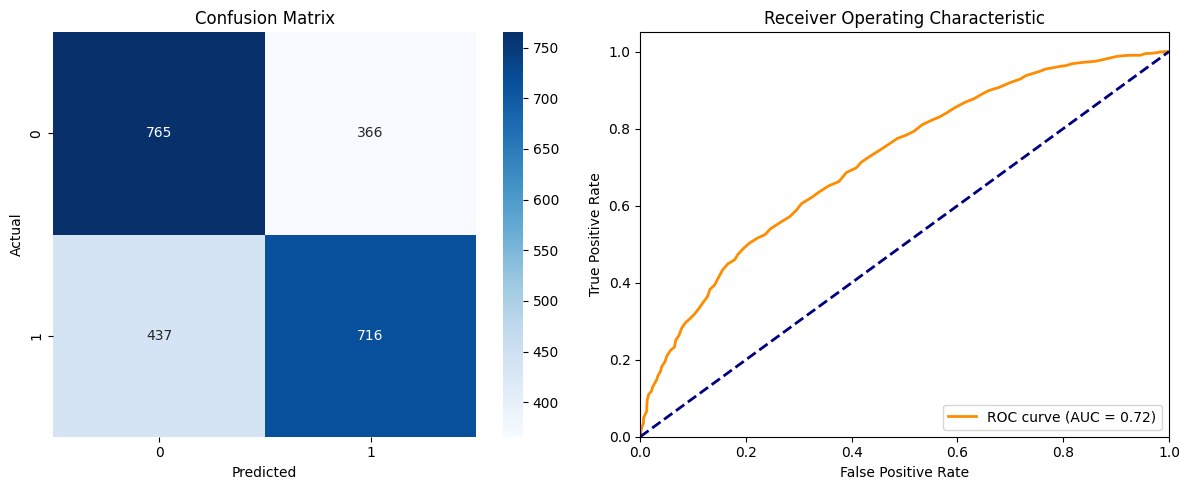

In [20]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc

import matplotlib.pyplot as plt

# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax1)
ax1.set_xlabel('Predicted')
ax1.set_ylabel('Actual')
ax1.set_title('Confusion Matrix')

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
ax2.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
ax2.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
ax2.set_xlim([0.0, 1.0])
ax2.set_ylim([0.0, 1.05])
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('Receiver Operating Characteristic')
ax2.legend(loc="lower right")

plt.tight_layout()
plt.show()

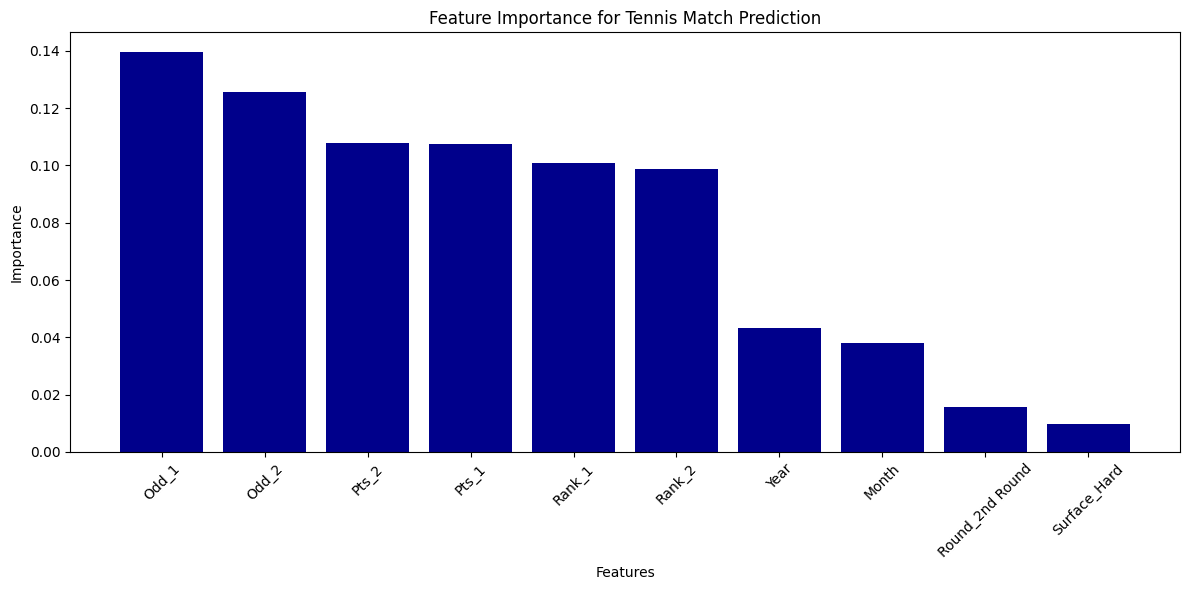


Top 10 most important features:
1. Odd_1 (0.139482)
2. Odd_2 (0.125574)
3. Pts_2 (0.107791)
4. Pts_1 (0.107499)
5. Rank_1 (0.100925)
6. Rank_2 (0.098789)
7. Year (0.043134)
8. Month (0.037908)
9. Round_2nd Round (0.015571)
10. Surface_Hard (0.009772)


In [21]:
# Get feature importances from the random forest classifier
feature_names = (numeric_features + 
                preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_features).tolist())

importances = final_pipeline.named_steps['classifier'].feature_importances_
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(12, 6))
plt.bar(range(10), importances[indices[:10]], align='center', color='darkblue')
plt.xticks(range(10), [feature_names[i] for i in indices[:10]], rotation=45)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance for Tennis Match Prediction')
plt.tight_layout()
plt.show()

# Print top 10 most important features
print("\nTop 10 most important features:")
for f in range(10):
    print("%d. %s (%f)" % (f + 1, feature_names[indices[f]], importances[indices[f]]))

Let us see the model predictions of the first 10 records.

In [22]:
# Create a dataframe with actual match information and predictions
prediction_df = X_test.copy()
prediction_df['Predicted_Win_Probability'] = y_pred_proba
prediction_df['Actual_Winner'] = y_test
prediction_df['Predicted_Winner'] = y_pred

# Display first 10 records with predictions
display_columns = ['Tournament', 'Round', 'Predicted_Win_Probability', 'Actual_Winner', 'Predicted_Winner']
print("\nFirst 10 Match Predictions: 1 = Player 1 Wins, 0 = Player 2 Wins")
pd.set_option('display.max_columns', None)
prediction_df[display_columns].head(10)


First 10 Match Predictions: 1 = Player 1 Wins, 0 = Player 2 Wins


,Tournament,Round,Predicted_Win_Probability,Actual_Winner,Predicted_Winner
35973,US Open,3rd Round,0.51,0,1
34181,Melbourne Summer Set 2,Semifinals,0.42,0,0
36141,Tallinn Open,1st Round,0.71,0,1
34705,Miami Open,2nd Round,0.36,0,0
37585,German Open,1st Round,0.09,0,0
39104,Qatar Open,1st Round,0.54,1,1
37076,Copa Colsanitas,Semifinals,0.51,1,1
40079,Rothesay International,1st Round,0.14,0,0
32144,Adelaide International,2nd Round,0.33,1,0
35647,Poland Open,Quarterfinals,0.75,0,1


## Discussion and Conclusion
Overall, the Random Forest Classification model predicts match winners with a 65% precision (percent of true positives out of all positives) among women's singles matches. The Area Under the Curve is 0.716, which suggests that this model is fair and has some ability to predict match winners. To improve the model, I am considering filtering the dataset down to include only tournaments played on hard surfaces. Additional metrics such as the following can be considered as well:  
- calculating probability of winning based on the Odd_1 and Odd_2 columns
- caclulating upset detection (where player with lower probability of winning wins the match)